# Customer Churn Analysis

This project focuses on analysing the customer behaviour and identifying patterns that lead to churn, enabling companies to implement proactive retention strategies. 

The analysis of the Teclo cutomer Churn dataset, highlight some key features that can be great tools to help businesses retain valuable customers. 

We use parameters like **Tenure Months, Churn Values, Churn Labels, Total Charges, Monthly Charges, Payment Reasons, and CLTV (Customer Lifetime Value)** to gain deep insights behind the reasons for customer churn, allowing businesses to develop data driven strategies to better retain customers. 


In [1]:
!pip install openpyxl

In [3]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



ModuleNotFoundError: No module named 'numpy'

In [ ]:
filepath = '/Users/ankitwalimbe/notebooks/churn-telco/data/Telco-Customer-Churn.xlsx'
data = pd.read_excel(filepath, engine = 'openpyxl')

In [4]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
# Checking for column names,types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [7]:
# DATA CLEANING
# Converting 'Total Charges' from objects to numerical values

data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors = 'coerce')

In [8]:
print(data.isnull().sum())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [9]:
# We have 11 and 5174 null values in the columns 'Total Charges' & 'Churn '

data['Total Charges'] = data['Total Charges'].fillna(data['Total Charges'].median())

data['Churn Reason'] = data['Churn Reason'].fillna('Unknown')

In [10]:
# Rechecking for null values
print(data.isnull().sum())

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64


In [11]:
# Convert categorical columns to category type
categorical_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Churn Label']

for col in categorical_cols:
    data[col] = data[col].astype('category')

In [12]:
# Checking for duplicate rows

print(f"Duplicates: {data.duplicated().sum()}")

data = data.drop_duplicates()

Duplicates: 0


In [13]:
# Ensuring the customerID have unique values and do not have null values

print(data['CustomerID'].is_unique) # Returning True or False
print(data['CustomerID'].isnull().sum())

print(data['Payment Method'].unique())

True
0
['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [14]:
data['Tenure Years'] = data['Tenure Months'] / 12

In [15]:
# Rechecking the data
data.info()
data.isnull().sum()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         7043 non-null   object  
 1   Count              7043 non-null   int64   
 2   Country            7043 non-null   object  
 3   State              7043 non-null   object  
 4   City               7043 non-null   object  
 5   Zip Code           7043 non-null   int64   
 6   Lat Long           7043 non-null   object  
 7   Latitude           7043 non-null   float64 
 8   Longitude          7043 non-null   float64 
 9   Gender             7043 non-null   category
 10  Senior Citizen     7043 non-null   category
 11  Partner            7043 non-null   category
 12  Dependents         7043 non-null   category
 13  Tenure Months      7043 non-null   int64   
 14  Phone Service      7043 non-null   object  
 15  Multiple Lines     7043 non-null   object  
 16  Intern

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Tenure Years
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,0.166667
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,0.166667
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved,0.666667
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,2.333333
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,4.083333


In [16]:
df = data.copy()
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         7043 non-null   object  
 1   Count              7043 non-null   int64   
 2   Country            7043 non-null   object  
 3   State              7043 non-null   object  
 4   City               7043 non-null   object  
 5   Zip Code           7043 non-null   int64   
 6   Lat Long           7043 non-null   object  
 7   Latitude           7043 non-null   float64 
 8   Longitude          7043 non-null   float64 
 9   Gender             7043 non-null   category
 10  Senior Citizen     7043 non-null   category
 11  Partner            7043 non-null   category
 12  Dependents         7043 non-null   category
 13  Tenure Months      7043 non-null   int64   
 14  Phone Service      7043 non-null   object  
 15  Multiple Lines     7043 non-null   object  
 16  Intern

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Tenure Years
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2281.916928,0.265370,58.699418,4400.295755,2.697596
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2265.270398,0.441561,21.525131,1183.057152,2.046623
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,402.225000,0.000000,40.000000,3469.000000,0.750000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000,2.416667
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000,4.583333
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000,6.000000


In [17]:
# CHURN ANALYSIS
# Customer Segmentation 

filtered_df = df.drop(['CustomerID','Count','Lat Long','Latitude','Longitude','Zip Code'],axis = 1)
num_cols = filtered_df.select_dtypes(include = ['int64', 'float64']).columns
churn_analysis = filtered_df.groupby('Churn Label', observed = False)[num_cols].mean()

# Adding Customer count
churn_counts = df['Churn Label'].value_counts()
churn_analysis['Customer Count'] = churn_counts

churn_analysis

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Tenure Years,Customer Count
Churn Label,,,,,,,,
No,37.569965,61.265124,2552.882494,0.0,50.098183,4490.921337,3.130830,5174
Yes,17.979133,74.441332,1531.796094,1.0,82.510433,4149.414660,1.498261,1869


**From the above table we can draw a few insights:**


1. Churned customers tendy to have shorter time/tenure, with the average tenure being 18 months or 1.5 months for customers who chrun, and the customers who do not churn have an average tenure period of (approx) 38 months or 3 years.
2. It is observed that customers who pay higher per month tend to churn with the average monthly payment for churned customer being ~ $75, indicating lower satisfaction with pricing.
3. Total charges for churned customers is significantly lower than retianed customers due the revenue brought in over time, highlighting the value of retaining customers.
4. Churned customers consistently exhibit higher churn socres, indicating that churn analysis serves as a highly effective predictive tool.
5. The Customer Lifetime Value (CLTV) for both churned and retained customers is comparable, suggesting that churned customers contributed a significant value despite their shorter tenure, as seen in the average monthly payments. 




<Axes: title={'center': 'Churn Distribution'}, xlabel='Churn Label'>

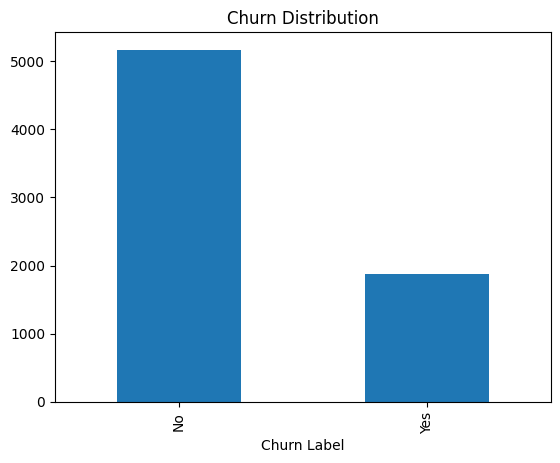

In [18]:
# Visualising the churn data

df['Churn Label'].value_counts().plot(kind = 'bar', title = 'Churn Distribution')

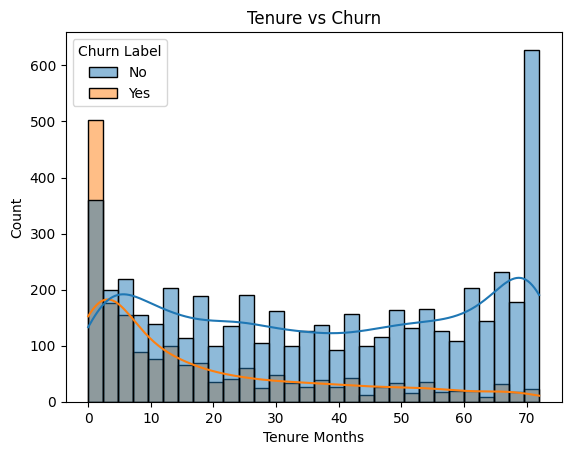

In [19]:
# Analysing relationship between Tenure and Churn 

# Replacing infinity with NaN in the dataframe
df.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.histplot(data = df, x = 'Tenure Months', hue = 'Churn Label', kde = True, bins = 30, discrete = False)
plt.title ('Tenure vs Churn')
plt.show()
warnings.filterwarnings('ignore')

As we can see the cutomers with lower tenures are more likely to Churn

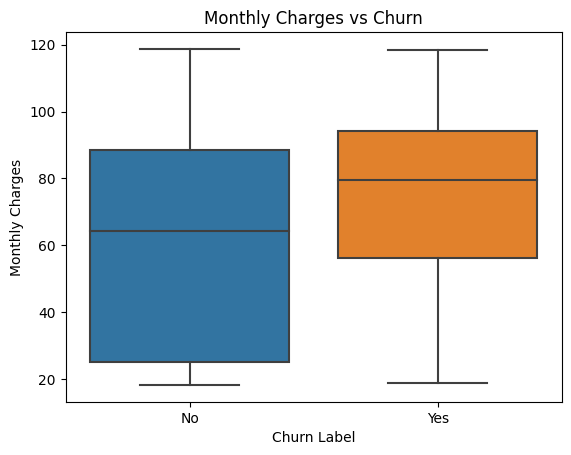

In [20]:
# Monthly Charges vs Churn

sns.boxplot(data = df, x = 'Churn Label', y = 'Monthly Charges')
plt.title('Monthly Charges vs Churn')
plt.show
warnings.filterwarnings('ignore')

Here we can see cutomers who have higher monthly chragers show higher churn rate

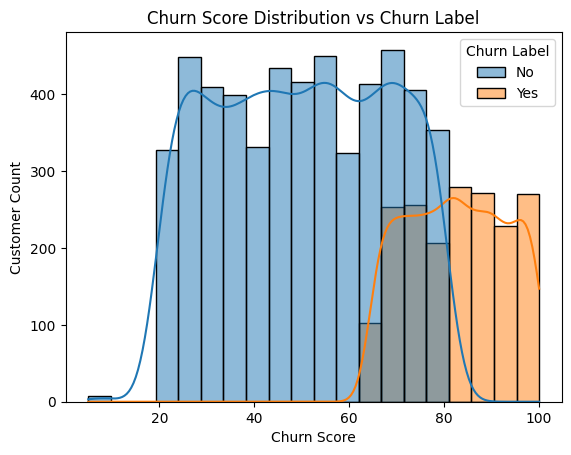

In [21]:
# Churn Score
df.replace([np.inf, -np.inf], np.nan, inplace=True)

sns.histplot(data = df , x = 'Churn Score', hue = 'Churn Label', kde = True, bins = 20)
plt.title('Churn Score Distribution vs Churn Label')
plt.xlabel('Churn Score')
plt.ylabel('Customer Count')
plt.show()
warnings.filterwarnings('ignore')

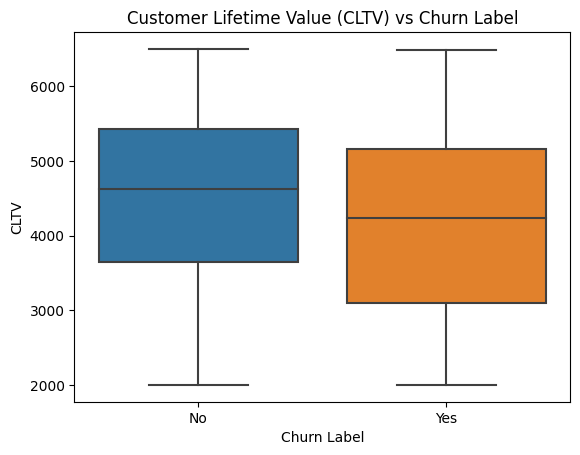

In [22]:
# Customer Lifetime Value (CLTV)

sns.boxplot(data = df, x = 'Churn Label', y = 'CLTV')
plt.title('Customer Lifetime Value (CLTV) vs Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('CLTV')
plt.show()
warnings.filterwarnings('ignore')

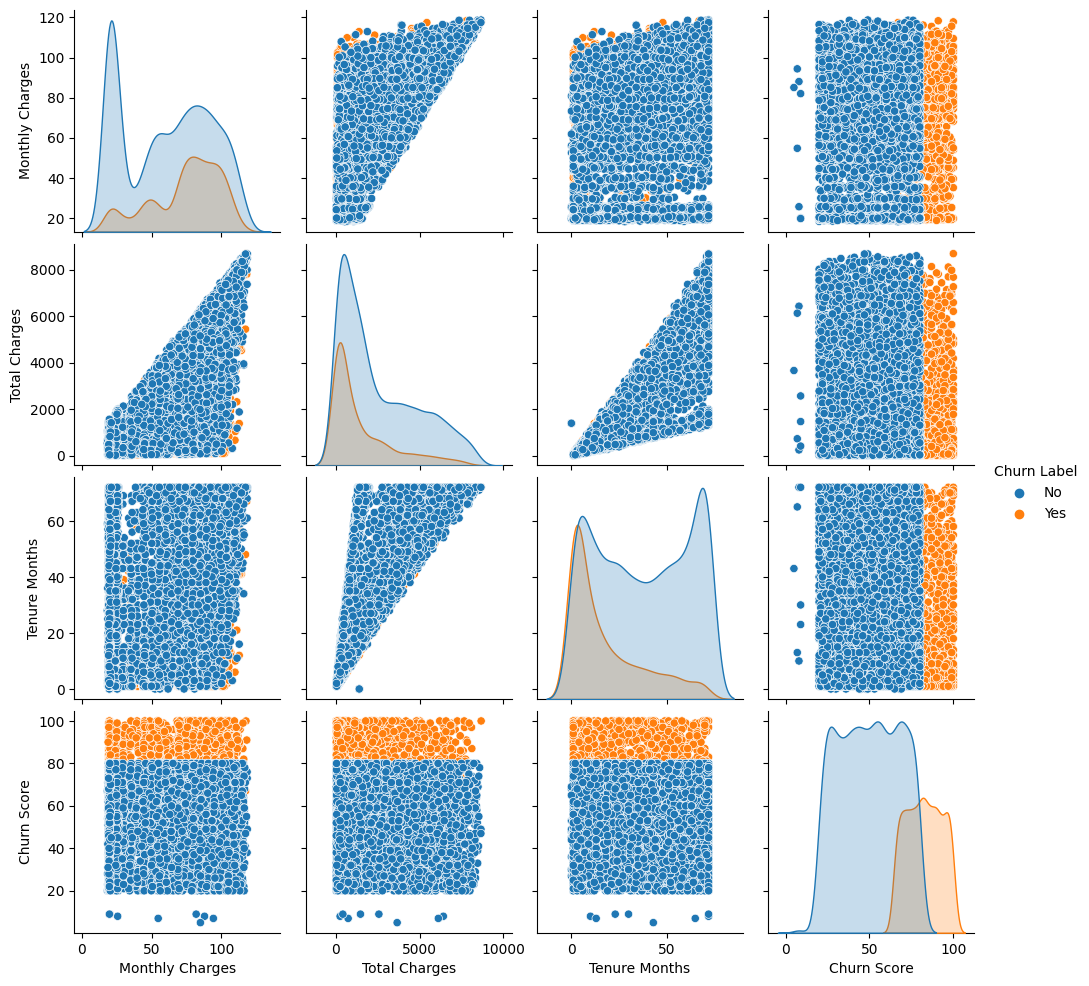

In [23]:
# Visualising key features
df.replace([np.inf, -np.inf], np.nan, inplace=True)

numerical_cols = ['Monthly Charges', 'Total Charges', 'Tenure Months', 'Churn Score']
sns.pairplot(df, vars = numerical_cols, hue = 'Churn Label', diag_kind = 'kde')
plt.show()
warnings.filterwarnings('ignore')

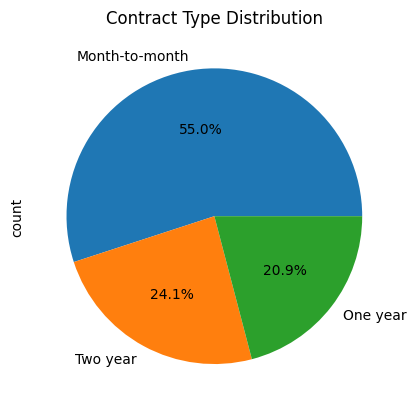

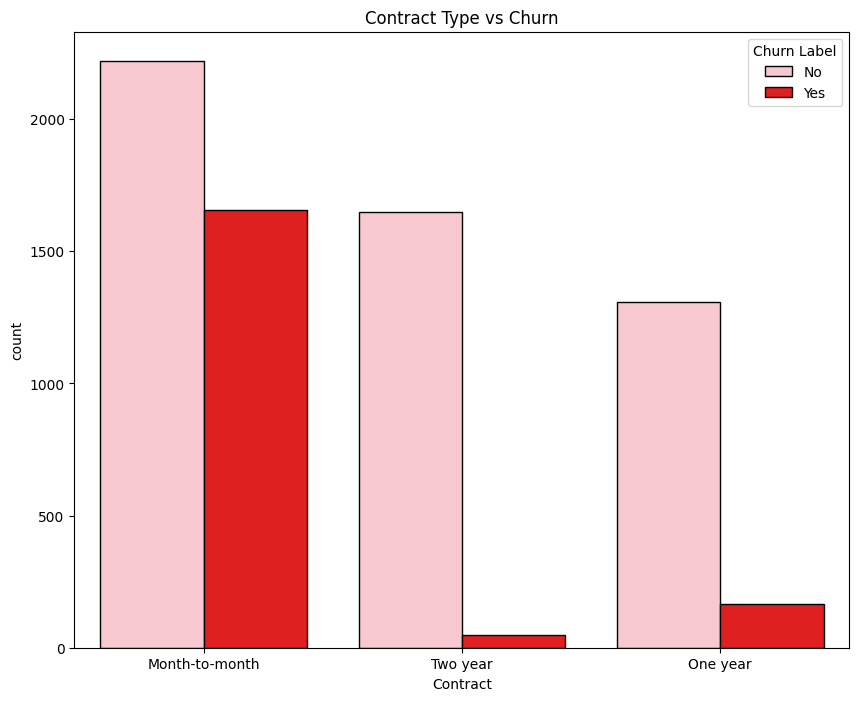

In [24]:
# Contract type vs Churn

df['Contract'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', title = 'Contract Type Distribution')
plt.figure(figsize = (10,8))
custom_palette = ['pink', 'red','lightblue']
sns.countplot(data = df, x = 'Contract', hue = 'Churn Label', edgecolor = 'black', palette = custom_palette)
plt.title('Contract Type vs Churn')
plt.show()


Based on the pie chart that shows the 'Contract Type Distribution', we ca see a good 55% of the customers pay on Month-to-month bases, with 21% paying on a yearly basis, and 24.1% pay every two years.

And the second plot we see 1500 plus customers who churn in month-to-month contract. while customers with other contract types see significnalty lower Churn count. 

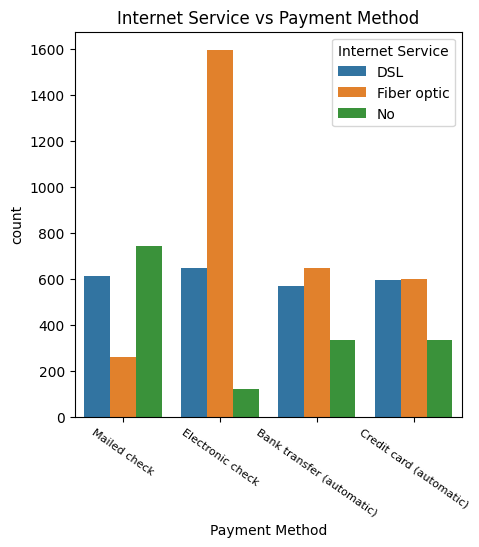

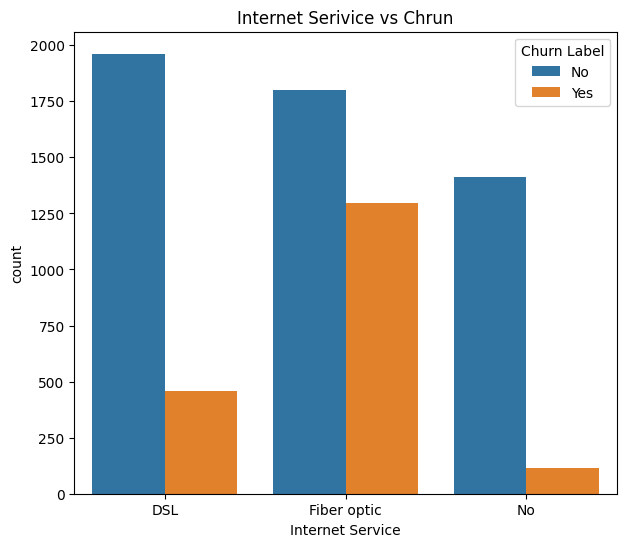

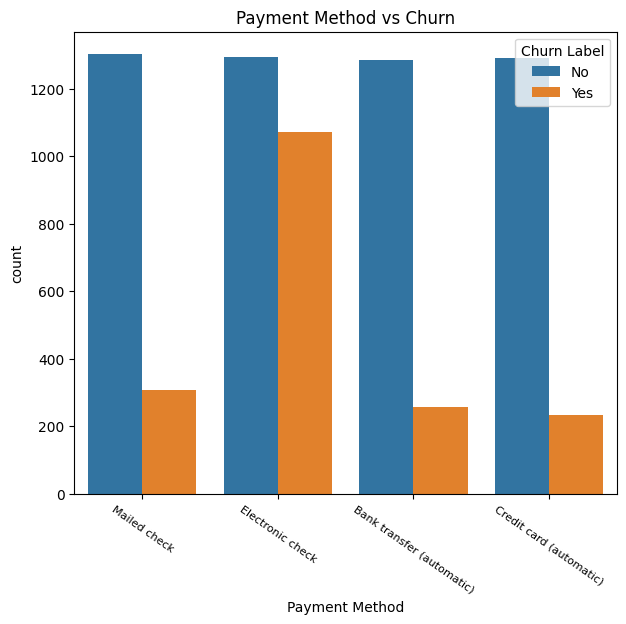

In [25]:
# Further we analyse the catagorical data
plt.figure(figsize = (5,5))
sns.countplot(data = df, x = 'Payment Method', hue = 'Internet Service')
plt.xticks(rotation = -35, fontsize = 8)
plt.title('Internet Service vs Payment Method')
plt.show()

plt.figure(figsize = (7,6))
sns.countplot(data = df , x = 'Internet Service', hue = 'Churn Label')
plt.title('Internet Serivice vs Chrun')
plt.show()

plt.figure(figsize = (7,6))
sns.countplot(data = df , x = 'Payment Method', hue = 'Churn Label')
plt.xticks(rotation = -35, fontsize = 8)
plt.title('Payment Method vs Churn')
plt.show() 

Seeing as there are a significant values under the category 'No' for all three payment metohds, lets see if there exist a correlation between customers who have no internet service but have phone service

Furthermore the highest Churn rate is seen for Electronic Payment, additionally we see that that payment method is highly used for 'Fiber Optics', indicating that it has the highest Churn amoungst the various Internet services. 

In [26]:
# Filtering data for customers with 'No' Internet Service
no_internet_df = df[df['Internet Service'] == 'No']

# Counting the customers who have Phone Service

yes_ps_count = no_internet_df[no_internet_df['Phone Service'] == 'Yes'].shape[0]

total_no_internet = no_internet_df.shape[0]

print(f"Number of customers who have no internet service but have a phone service: {yes_ps_count}")
print(f"Total number of people who have no internet service: {total_no_internet}")

Number of customers who have no internet service but have a phone service: 1526
Total number of people who have no internet service: 1526


The two values are the same, indicatiing that the two are related, thus calrifying that customers who have internet service have phone service. 

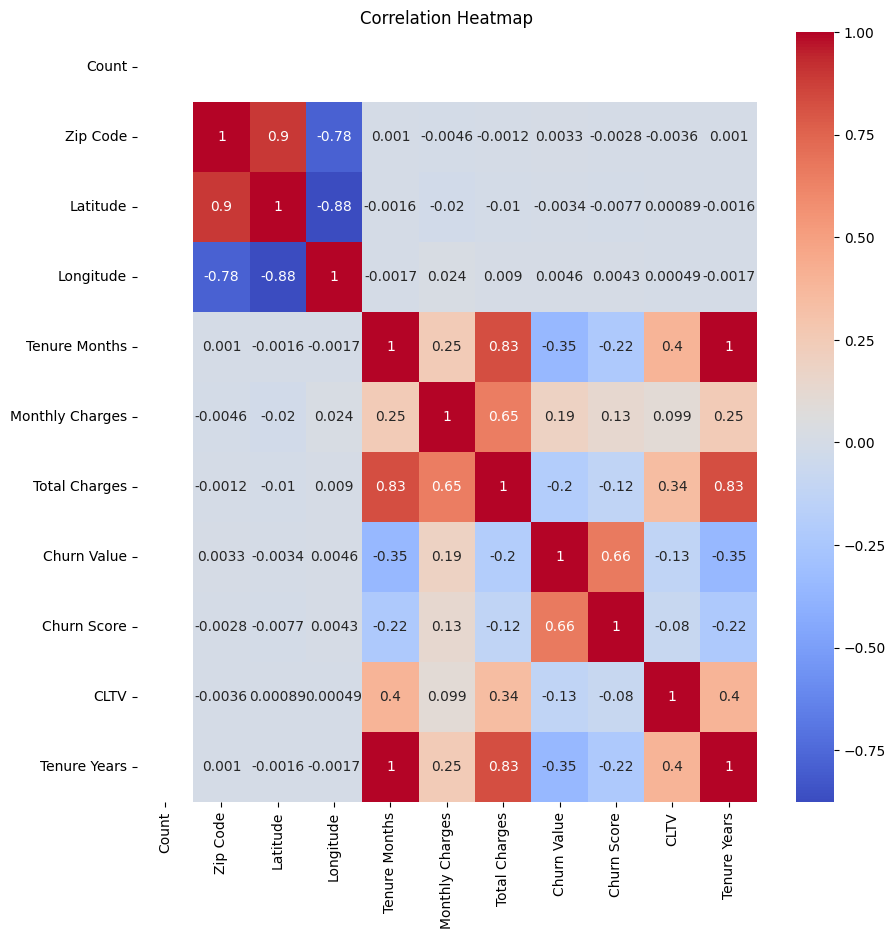

In [27]:
# Correlation analysis
# Taking only the numerical data from the dataframe

n_df = df.select_dtypes(include = ['int64', 'float64'])
correlation_matrix = n_df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, annot =  True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
# print(correlation_matrix)
plt.show()


Strong corelation of ~ 0.83 between Tenure Months and Total Charges shows that customers with longer tenure tend to generate higher total revenue, an expected relation as long term customers pay for the services for long time. 
Similarly there is a strong correlation between Churn Score and Churn Value of ~ 0.66, showing that this metric is a reliable tool to use indentify customers at risk of leaving. 
Furthermore the relation between Monthly Charges and Total Charges (~ 0.65), suggesting customers with higher monthly charges also contribute more to the total revenue.

The correlation value of -0.35 between Churn Value and Tenure Months shows that the customers with short tenure are more likely to churn.

***Key Takeaways***
* **Churn Risk Factors**: Customers with short tenure are more likely to churn. Furthermore customers with **higher monthly charges** tend to churn more frequentl, possibly due to dissatisfaction with pricing or percived value.
* **CLTV**: Customers with higher CLTV are less likely to churn, indicating the importance of priotising the retention of such customers,as they bring a significant amount of revenue.
* **Churn Score Validity**: The strong correlation between Churn Score and Churn Value (~ 0.66), indicates that this method is highly useful in indentifing high risk customer, which can be a strong tool to develop hightly targeted retention stratigies.
* **Revenue Insights**: Long term customers and higher monthly charges generate higher Total charges. Highlighting the financial value of long-term customers.

***What can be done?***
* Improve statisfaction and engagement in the first 2 years of the customer's tenure.
* Addressing pricing sensitivity by offering discounts, rewards, or other added benefits to high paying customers to reeduce churn and improve retention.
* Using the churn score to proactively target high-risk customers for retention campaigns. 